In [1]:
import pandas as pd
import numpy as np

import graphviz
from xgboost import XGBRegressor
from xgboost import plot_tree 
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 30


/home/gaurang/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/gaurang/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/gaurang/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
train_inputs = pd.read_csv('train_input.csv')
train_targets = pd.read_csv('train_targets.csv')
test_inputs = pd.read_csv('test_inputs.csv')

In [3]:
train_inputs.head()

,Unnamed: 0,Store,Promo,SchoolHoliday,CompetitionDistance,Comp_Open,Promo2,Promo2Open,IsPromo2Month,Day,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0,0.000000,1.0,1.0,0.016482,0.059163,0.0,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,0.000898,1.0,1.0,0.007252,0.066378,1.0,0.890710,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0.001795,1.0,1.0,0.186050,0.074315,1.0,0.720856,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,0.002693,1.0,1.0,0.007911,0.050505,0.0,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,0.003591,1.0,1.0,0.394119,0.002165,0.0,0.000000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
train_targets

,Unnamed: 0,Sales
0,0,5263
1,1,6064
2,2,8314
3,3,13995
4,4,4822
...,...,...
844387,1016776,3375
844388,1016827,10765
844389,1016863,5035
844390,1017042,4491


In [5]:
train_targets.drop('Unnamed: 0', axis=1, inplace=True)

## XGBoost Regression Model 

In [6]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [7]:
%%time
model.fit(train_inputs, train_targets)

/home/gaurang/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: user 56.3 s, sys: 694 ms, total: 57 s
Wall time: 9.4 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
preds = model.predict(train_inputs)
preds

array([ 7919.3804,  7355.0576,  7958.8174, ...,  6472.0425,  9533.734 ,
       10538.794 ], dtype=float32)

In [9]:
def rmse(a, b):
  return mean_squared_error(a, b, squared=False)

In [11]:
# plot_tree(model, rankdir='LR')

In [12]:
# plot_tree(model, rankdir='LR', num_trees=1);

In [14]:
# plot_tree(model, rankdir='LR', num_trees=10)

In [15]:
trees = model.get_booster().get_dump()
print(len(trees))
print('------------------------------------')
print(trees[0])

20
------------------------------------
0:[Promo<0.5] yes=1,no=2,missing=1
	1:[StoreType_b<0.5] yes=3,no=4,missing=3
		3:[Assortment_a<0.5] yes=7,no=8,missing=7
			7:[CompetitionDistance<0.00441719405] yes=15,no=16,missing=15
				15:leaf=2309.51147
				16:leaf=1823.30444
			8:[WeekOfYear<0.911764741] yes=17,no=18,missing=17
				17:leaf=1619.43994
				18:leaf=2002.44897
		4:[CompetitionDistance<0.01602057] yes=9,no=10,missing=9
			9:[CompetitionDistance<0.0134493671] yes=19,no=20,missing=19
				19:leaf=2740.44067
				20:leaf=5576.85889
			10:[DayOfWeek_7<0.5] yes=21,no=22,missing=21
				21:leaf=1898.36487
				22:leaf=2961.08765
	2:[DayOfWeek_1<0.5] yes=5,no=6,missing=5
		5:[Month<0.954545498] yes=11,no=12,missing=11
			11:[StoreType_b<0.5] yes=23,no=24,missing=23
				23:leaf=2295.30566
				24:leaf=3294.27759
			12:[Day<0.333333343] yes=25,no=26,missing=25
				25:leaf=2754.58521
				26:leaf=3246.39014
		6:[Month<0.954545498] yes=13,no=14,missing=13
			13:[CompetitionDistance<0.002703059]

In [16]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'imp': model.feature_importances_
}).sort_values('imp', ascending=False)

importance_df.head()

,feature,imp
2,Promo,0.293443
27,StoreType_d,0.083303
25,StoreType_b,0.080397
13,DayOfWeek_1,0.076351
6,Promo2,0.060924


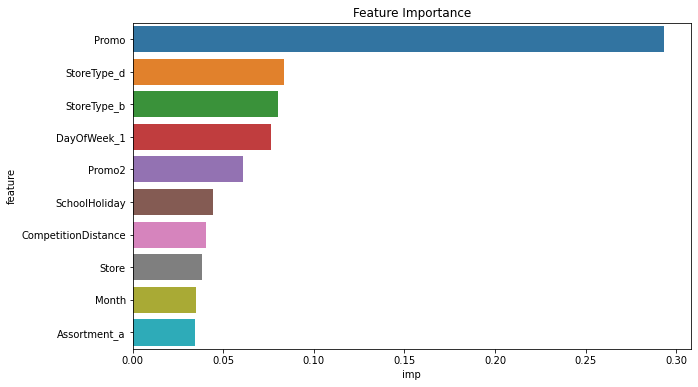

In [17]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='imp', y='feature');

## KFold Cross Validation 

In [ ]:
kfold = KFold(n_splits=5)

In [ ]:
'''
    Helper function to intialize model and calculate train & validation rmse scores
'''

def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
  model = XGBRegressor(random_state=42, n_jobs=-1, **params)
  model.fit(X_train, train_targets)
  train_rmse = rmse(model.predict(X_train), train_targets)
  val_rmse = rmse(model.predict(X_val), val_targets)
  return model, train_rmse, val_rmse

In [ ]:
models = []

for train_idxs, val_idxs in kfold.split(train_inputs):

  # Using kfold to split datasets
  train_input, train_target = train_inputs.iloc[train_idxs], train_targets.iloc[train_idxs]
  val_input, val_target = train_inputs.iloc[val_idxs], train_targets.iloc[val_idxs]

  model, train_rmse, val_rmse = train_and_evaluate(train_input, 
                                                     train_target, 
                                                     val_input, 
                                                     val_target, 
                                                     max_depth=4, 
                                                     n_estimators=20)
  models.append(model)
  print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [ ]:
def pred_avg(models, inputs):
  return np.mean([model.predict(inputs) for model in models], axis=0)

preds = pred_avg(models, train_inputs)
preds

## Hyperparameter Tunning

In [ ]:
'''
   Here is helper function to split dataset for XGBoost model and test it on different hyperparameters 
'''

def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(train_inputs, train_targets, test_size=0.1)

def test_params(**params):
  model = XGBRegressor(n_job=-1, random_state=42, **params)
  model.fit(train_input, train_target)
  preds = model.predict(train_input)
  train_rmse = rmse(preds, train_target)
  preds = model.predict(val_input)
  val_rmse = rmse(preds, val_target)
  print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

### `test_params`

1. `max_depth` = [2, 5, 10] 
2. `n_estimators=50, learning_rate=0.1` = {(50, 0.01), (50, 0.01), (50, 0.1), (50, 0.3), (50, 0.9), (50, 0.99)}

In [ ]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [ ]:
%%time
model.fit(train_inputs, train_targets)

In [ ]:
test_preds = model.predict(test_inputs)

In [ ]:
sub_df

In [ ]:
sub_df['Sales']  = test_preds
sub_df

In [ ]:
sub_df.to_csv('submission.csv', index=None)